## RLS(Robust Linear Models):鲁棒线性回归

In [1]:

%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [4]:
data = sm.datasets.stackloss.load()
data.exog = sm.add_constant(data.exog)
data.exog

array([[ 1., 80., 27., 89.],
       [ 1., 80., 27., 88.],
       [ 1., 75., 25., 90.],
       [ 1., 62., 24., 87.],
       [ 1., 62., 22., 87.],
       [ 1., 62., 23., 87.],
       [ 1., 62., 24., 93.],
       [ 1., 62., 24., 93.],
       [ 1., 58., 23., 87.],
       [ 1., 58., 18., 80.],
       [ 1., 58., 18., 89.],
       [ 1., 58., 17., 88.],
       [ 1., 58., 18., 82.],
       [ 1., 58., 19., 93.],
       [ 1., 50., 18., 89.],
       [ 1., 50., 18., 86.],
       [ 1., 50., 19., 72.],
       [ 1., 50., 19., 79.],
       [ 1., 50., 20., 80.],
       [ 1., 56., 20., 82.],
       [ 1., 70., 20., 91.]])

In [100]:
#具有(默认)中值绝对偏差缩放的Huber's T范数
huber_t = sm.RLM(data.endog,data.exog,M=sm.robust.norms.HuberT())
result = huber_t.fit()
print(result.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 22 May 2019                                         
Time:                        16:02:38                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.0265      9.792     -4.190      0.0

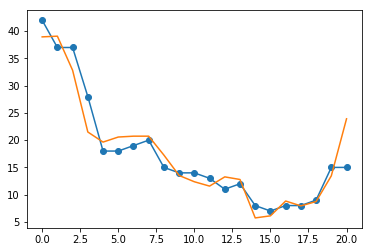

In [101]:
plt.plot(data.endog,'o-')
plt.plot(result.fittedvalues)
# plt.plot(result.predict())

## Comparing OLS and RLM

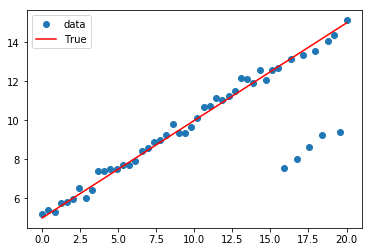

In [77]:
nsample = 50
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, (x1-5)**2))
X = sm.add_constant(X)
sig = 0.3   # smaller error variance makes OLS<->RLM contrast bigger
beta = [5, 0.5, -0.0]
y_true2 = np.dot(X, beta)
y2 = y_true2 + sig*1. * np.random.normal(size=nsample)
y2[[39,41,43,45,48]] -= 5   # add some outliers (10% of nsample)
plt.plot(x1,y2,'o',label='data')
plt.plot(x1,y_true2,'r',label='True')
plt.legend(loc='best')

In [78]:
#使用OLS拟合
res1 = sm.OLS(y2,X).fit()
#使用RLM拟合
res2 = sm.RLM(y2,X).fit()

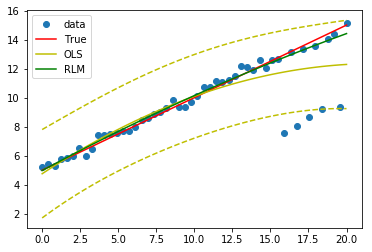

In [79]:
prstd,iv_l,iv_u = wls_prediction_std(res1) #预测的标准差和置信区间
plt.plot(x1,y2,'o',label='data')
plt.plot(x1,y_true2,'r',label='True')
plt.plot(x1,res1.fittedvalues,'y',label='OLS')
plt.plot(x1,res2.fittedvalues,'g',label='RLM')
plt.plot(x1,iv_l,'y--')
plt.plot(x1,iv_u,'y--')
plt.legend(loc='best')

## 拟合线性方程

In [86]:
X2 = X[:,[0,1]]
# y2 = np.dot(X2,beta[:2])
rst = sm.OLS(y2,X2).fit()
# print(rst.summary())
rst2 = sm.RLM(y2,X2).fit()
# print(rst2.summary())
rst2.params

array([5.22690334, 0.47736283])

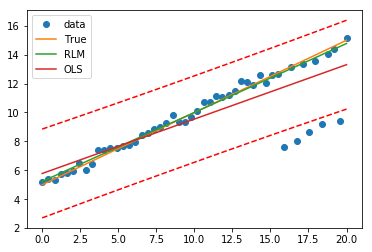

In [96]:
prstd,iv_l,iv_u = wls_prediction_std(rst)
# fig,ax = plt.subplots(111)
# rst.params
plt.plot(x1,y2,'o',label='data')
plt.plot(x1,y_true2,label="True")
plt.plot(x1,rst2.fittedvalues,label='RLM')
plt.plot(x1,rst.fittedvalues,label='OLS')
plt.plot(x1,iv_l,'r--')
plt.plot(x1,iv_u,'r--')
plt.legend(loc='best')